In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import sys
import cv2
import matplotlib.pyplot as plt
from subprocess import check_output
from numpy import savez_compressed
from PIL import Image

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import regularizers
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
import numpy as np
import os
import time
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In [ ]:
os.getcwd()

'/content'

In [4]:
os.chdir("/content/gdrive/MyDrive/DR_MODEL")

In [5]:
os.getcwd()

'/content/gdrive/MyDrive/DR_MODEL'

In [ ]:


#moving 1000 images to a new folder in the drive to work on it
import glob
import shutil
import os

src_dir = "/content/gdrive/MyDrive/DR_MODEL/train"
dst_dir = "/content/gdrive/MyDrive/DR_MODEL/new_dataset"
count =0
for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpeg")):
  if count<1000:
    shutil.copy(jpgfile, dst_dir)
  else:
    break
  count = count+1  


In [ ]:
class_names = ["No DR", "Mild","Moderate","Severe","Proliferative DR"]
#HEIGHT, WIDTH, DEPTH = 128,128,3
img_rows, img_cols = 128, 128
NUM_CLASSES = 5
BS = 64
EPOCHS = 15
#inputShape = (HEIGHT, WIDTH, DEPTH)
IMG_SIZE = 128

In [ ]:
trainDir = "/content/gdrive/MyDrive/DR_MODEL/new_dataset"

In [29]:
file = "/content/gdrive/MyDrive/DR_MODEL/new_dataset/84_left.jpeg"

In [26]:
import matplotlib.pyplot as plt


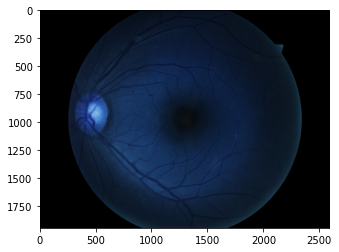

In [40]:
image = cv2.imread(file,1)
plt.imshow(image)

In [13]:
0def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img


In [14]:
path = '/content/gdrive/MyDrive/DR_MODEL/DR3000-60.h5'

In [15]:
from keras.models import load_model


In [71]:
def import_and_predict(image):
    model = load_model(r'/content/gdrive/MyDrive/DR_MODEL/DR3000-60.h5')
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (128, 128))
    image=cv2.GaussianBlur( image , (5,5) ,0)
    image = np.array(image, dtype="float") / 255.0
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    score = model.predict(image)
    class_names = {0: "No DR",
            1:"Mild",
            2:"Moderate",
            3:"Severe",
            4:"Proliferative DR"}
    #result = f"{class_names[np.argmax(score)]} with a { (100 * np.max(score)).round(2) } % confidence."
    result = (class_names[np.argmax(score)],100 * np.max(score).round(2))

    return result

In [78]:
value = import_and_predict(file)
print(str(value[0])  + " with confidence level "+str(value[1]))

No DR with confidence level 47.999998927116394


In [ ]:
class_names = {"No DR":0,
            "Mild":1,
            "Moderate":2,
            "Severe":3,
            "Proliferative DR":4}
result = f"{class_names[np.argmax(score)]} with a { (100 * np.max(score)).round(2) } % confidence."
result

In [ ]:
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

In [ ]:
images = os.listdir(trainDir)
count = len(images)
count

1000

In [ ]:
sigmaX =10
import os
tempDir = "/content/gdrive/MyDrive/DR_MODEL/tempDir"
images = os.listdir(tempDir)
for imagefilename in images:
  imagefullpath = os.path.join(os.path.sep,tempDir,imagefilename)
  image = cv2.imread(imagefullpath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
  image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
  plt.figure(figsize=(10, 10))
  plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sigmaX=10
imagefullpath = "/content/gdrive/MyDrive/DR_MODEL/new_dataset/84_right.jpeg"
image = cv2.imread(imagefullpath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = crop_image_from_gray(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)



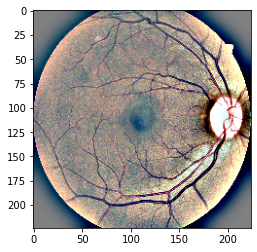

In [ ]:
plt.imshow(image)

In [ ]:
def load_ben_color(trainDir, sigmaX=10):
  data = []
  images = os.listdir(trainDir)
  #print("Number of files in new_dataset is " + str(len(images)))
  for imagefilename in images:
    imagefullpath = os.path.join(os.path.sep,trainDir,imagefilename)
    image = cv2.imread(imagefullpath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.GaussianBlur( image , (5,5) ,0)
    image = np.array(image, dtype="float") / 255.0
    data.append(np.array(image))    
  return data

In [ ]:
data = load_ben_color(trainDir)
np.savez('preprocessed_gauss_128_imgarr.npz', *data)


In [ ]:
#224
container = np.load('/content/gdrive/MyDrive/DR_MODEL/new_preprocessed_imgarr.npz')
data = [container[key] for key in container]

In [ ]:
#128
container = np.load('/content/gdrive/MyDrive/DR_MODEL/preprocessed_gauss_128_imgarr.npz')
data = [container[key] for key in container]

In [ ]:
len(data)

1000

In [ ]:
import pandas as pd
trainLabels = pd.read_csv("/content/gdrive/MyDrive/DR_MODEL/trainLabels.csv")
trainLabels.shape

(35126, 2)

In [ ]:
images = os.listdir(trainDir)
imagelabels = []
for imagefilename in images:
  imagefilename = imagefilename.replace(".jpeg","")
  imagelabels.append(trainLabels.loc[trainLabels.image==imagefilename, 'level'].values[0])

In [ ]:
from sklearn.utils import shuffle

#converting images & labels to numpy arrays
data = np.asarray(data)
imagelabels = np.asarray(imagelabels)

img_data,Label = shuffle(data,imagelabels, random_state=2)
train_data = [img_data,Label]


In [ ]:
data= data.reshape(data.shape[0], img_cols*img_rows*3)

In [ ]:
data.shape

(1000, 49152)

In [ ]:
img_data,Label = shuffle(data,imagelabels, random_state=2)
train_data = [img_data,Label]

In [ ]:
(X, y) = (train_data[0],train_data[1])

In [ ]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 745, 2: 140, 1: 71, 3: 28, 4: 16})


In [ ]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,stratify =y, random_state=4)

In [ ]:
from imblearn.over_sampling import SMOTE
#x_train = pd.DataFrame(X_train)
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
X_resample = X_resample.reshape(X_resample.shape[0], img_cols,img_rows,3)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 3)

In [ ]:
from collections import Counter
counter = Counter(y_resampled)
print(counter)

Counter({0: 633, 1: 633, 2: 633, 4: 633, 3: 633})


In [ ]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
y_resampled = np_utils.to_categorical(y_resampled, NUM_CLASSES)
Y_test = np_utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 10

In [ ]:
#loading base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
#freeze_layers(base_model)
base_model.summary()
#model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
# Freeze the layers except the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in base_model.layers:
    print(layer, layer.trainable)
base_model.summary()


<keras.engine.input_layer.InputLayer object at 0x7f92e664bd10> False
<keras.layers.convolutional.Conv2D object at 0x7f92e4262090> False
<keras.layers.convolutional.Conv2D object at 0x7f92dea7b690> False
<keras.layers.pooling.MaxPooling2D object at 0x7f92d45ba490> False
<keras.layers.convolutional.Conv2D object at 0x7f92d0467610> False
<keras.layers.convolutional.Conv2D object at 0x7f92d04667d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f92d046d510> False
<keras.layers.convolutional.Conv2D object at 0x7f92d0477450> False
<keras.layers.convolutional.Conv2D object at 0x7f92d03fc9d0> False
<keras.layers.convolutional.Conv2D object at 0x7f92d046dfd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f92d0404390> False
<keras.layers.convolutional.Conv2D object at 0x7f92d040cc50> False
<keras.layers.convolutional.Conv2D object at 0x7f92d0407bd0> False
<keras.layers.convolutional.Conv2D object at 0x7f92d046dcd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f92d041e2d0>

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(base_model)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(nb_classes, activation='softmax', name ='output'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 output (Dense)              (None, 5)                 5125      
                                                                 
Total params: 23,109,445
Trainable params: 15,474,181
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
path = '/content/gdrive/MyDrive/DR_MODEL/vgg16-128-gauss-smote'


In [ ]:
history = model.fit(X_resample,y_resampled,epochs = 10, batch_size=32, validation_data=(X_test, Y_test),)
model.save(path)

Epoch 1/10
99/99 [==============================] - 50s 165ms/step - loss: 1.6566 - acc: 0.2041 - val_loss: 1.6481 - val_acc: 0.0267
Epoch 2/10
99/99 [==============================] - 10s 104ms/step - loss: 1.6104 - acc: 0.1946 - val_loss: 1.6190 - val_acc: 0.0267
Epoch 3/10
99/99 [==============================] - 10s 103ms/step - loss: 1.6100 - acc: 0.1886 - val_loss: 1.6144 - val_acc: 0.0267
Epoch 4/10
99/99 [==============================] - 10s 104ms/step - loss: 1.6097 - acc: 0.2051 - val_loss: 1.6116 - val_acc: 0.1400
Epoch 5/10
99/99 [==============================] - 10s 104ms/step - loss: 1.6097 - acc: 0.1921 - val_loss: 1.6050 - val_acc: 0.7467
Epoch 6/10
99/99 [==============================] - 10s 105ms/step - loss: 1.6102 - acc: 0.1814 - val_loss: 1.6084 - val_acc: 0.0267
Epoch 7/10
99/99 [==============================] - 10s 105ms/step - loss: 1.6099 - acc: 0.1987 - val_loss: 1.6070 - val_acc: 0.7467
Epoch 8/10
99/99 [==============================] - 10s 104ms/step - 

In [ ]:
history= model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/batchsize), 
                    epochs=10, validation_data=validation_generator, 
                    validation_steps=int(len(X_test)/batchsize))
model.save(path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
106/106 [==============================] - 51s 183ms/step - loss: 0.9539 - acc: 0.7363 - val_loss: 0.8359 - val_acc: 0.7500
Epoch 2/10
106/106 [==============================] - 18s 168ms/step - loss: 0.8631 - acc: 0.7435 - val_loss: 0.8165 - val_acc: 0.7569
Epoch 3/10
106/106 [==============================] - 18s 169ms/step - loss: 0.8512 - acc: 0.7458 - val_loss: 0.8491 - val_acc: 0.7431
Epoch 4/10
106/106 [==============================] - 18s 168ms/step - loss: 0.8582 - acc: 0.7447 - val_loss: 0.8106 - val_acc: 0.7569
Epoch 5/10
106/106 [==============================] - 18s 168ms/step - loss: 0.8543 - acc: 0.7470 - val_loss: 0.8279 - val_acc: 0.7500
Epoch 6/10
106/106 [==============================] - 18s 169ms/step - loss: 0.8640 - acc: 0.7447 - val_loss: 0.8543 - val_acc: 0.7431
Epoch 7/10
106/106 [==============================] - 18s 168ms/step - loss: 0.8628 - acc: 0.7447 - val_loss: 0.8578 - val_acc: 0.7431
Epoch 8/10
106/106 [==============================] - 1

In [ ]:
path = '/content/gdrive/MyDrive/DR_MODEL/vgg16-gauss-smote'

In [8]:
from keras.models import load_model
model = load_model(path)

NameError: ignored

In [ ]:
score = model.evaluate(X_test, Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.6125845909118652
Test accuracy: 0.013333333656191826


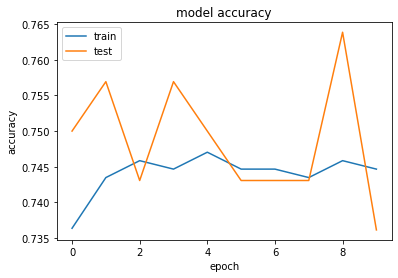

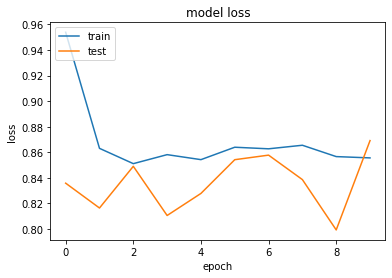

<Figure size 432x288 with 0 Axes>

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
predict_x = model.predict(X_test) 
print(predict_x)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[[7.74240673e-01 7.60713941e-04 2.23326117e-01 1.67251285e-03
  5.19140043e-11]
 [4.62287545e-01 2.32008249e-01 3.05618912e-01 8.53074889e-05
  3.40081614e-13]
 [7.50535011e-01 1.66057535e-02 2.27391079e-01 5.46701066e-03
  1.12728810e-06]
 [3.25814158e-01 2.75297668e-02 6.19087577e-01 1.10899527e-02
  1.64785553e-02]
 [4.16385949e-01 2.35994533e-01 3.43357563e-01 4.19496465e-03
  6.69656220e-05]
 [2.28243321e-01 8.45410451e-02 2.16915980e-01 4.27816927e-01
  4.24826592e-02]
 [2.54917473e-01 7.58645684e-02 5.66174567e-01 8.27657431e-02
  2.02776752e-02]
 [8.57163191e-01 1.79124778e-04 1.27596721e-01 1.50609165e-02
  3.73573422e-10]
 [8.62526536e-01 2.43556628e-04 1.37226969e-01 2.92757795e-06
  1.09638409e-10]
 [8.78775656e-01 9.52929899e-04 1.20263278e-01 8.20343757e-06
  2.46315175e-13]
 [8.55867743e-01 4.88578063e-03 1.39187366e-01 5.90479067e-05
  1.81073670e-10]
 [4.31451648e-01 5.45612201e-02 4.88509893e-01 2.54653692e-02
  1.18695434e-05]
 [8.05618942e-01 3.66529093e-05 1.936270

In [ ]:
test_classes = np.argmax(Y_test, axis =1)
test_classes

array([2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 4, 2, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 3])

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_classes, classes_x)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_classes, classes_x, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_classes, classes_x, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_classes, classes_x, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.746667
Precision: 0.746667
Recall: 0.746667
F1 score: 0.746667


In [ ]:
def balance_data(class_size,df):
    train_df = df.groupby(['level']).apply(lambda x: x.sample(class_size, replace = True)).reset_index(drop = True)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print('New Data Size:', train_df.shape[0], 'Old Size:', df.shape[0])
    train_df['level'].hist(figsize = (10, 5))
    return train_df

In [ ]:
from sklearn.model_selection import train_test_split
train2_df, val_df = train_test_split(df,test_size=0.1) # Here we will perform an 80%/20% split of the dataset, with stratification to k
train_df, test_df = train_test_split(train2_df,test_size=0.1)


In [ ]:
len(train_df)
#len(val_df)
#len(test_df)

810

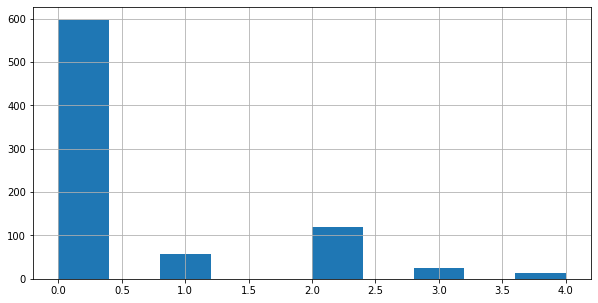

In [ ]:
train_df['level'].hist(figsize = (10, 5))


In [ ]:
train_df.pivot_table(index='level', aggfunc=len)

,data,image
level,,
0,597,597
1,57,57
2,119,119
3,24,24
4,13,13


New Data Size: 2985 Old Size: 810


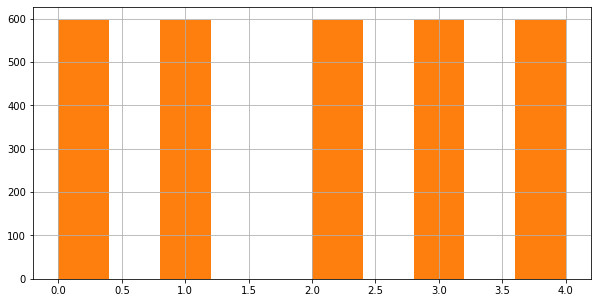

In [ ]:
train_df = balance_data(train_df.pivot_table(index='level', aggfunc=len).max().max(),train_df) # I will oversample such that all classes have the same number of images as the maximum
train_df['level'].hist(figsize = (10, 5))

In [ ]:
df = pd.concat([train_df,val_df, test_df]) #beginning of this dataframe is the oversampled training set, end is the validation set
len(df)

3175

In [ ]:
unique, counts = np.unique(df['level'], return_counts=True)
dict(zip(unique, counts))

{0: 745, 1: 611, 2: 618, 3: 601, 4: 600}

In [ ]:
trainX = train_df['data']
trainY = train_df['level']

testX = test_df['data']
testY = test_df['level']

valX = val_df['data']
valY = val_df['level']

print('trainX shape=', trainX.shape[0], 'testX shape =', testX.shape[0], 'valX shape=', valX.shape[0]) # 750, 250

trainX shape= 2985 testX shape = 90 valX shape= 100


In [ ]:
from sklearn.utils import shuffle
trainX = shuffle(trainX)


In [ ]:
df.pivot_table(index = 'level', aggfunc = len)

,data,image
level,,
0,745,745
1,611,611
2,618,618
3,601,601
4,600,600


In [ ]:
trainY = np.array(trainY)
testY  = np.array(testY)
valY = np.array(valY)

In [ ]:
type(trainX) 

pandas.core.series.Series

In [ ]:
trainY =  to_categorical(trainY, num_classes=NUM_CLASSES)
valY =  to_categorical(valY, num_classes=NUM_CLASSES)
testY = to_categorical(testY, num_classes=NUM_CLASSES)

In [ ]:
trainX.shape #change it to 9840,250,250,3

(2985,)

In [ ]:
#Reshaping trainX, testX, valY
from numpy import zeros
Xtrain = np.zeros([trainX.shape[0],HEIGHT, WIDTH, DEPTH])
for i in range(trainX.shape[0]): # 0 to traindf Size -1
    Xtrain[i] = trainX[i]
print(Xtrain.shape) # (750,128,128,3)

(2985, 128, 128, 3)


In [ ]:
from numpy import zeros
Xtest = np.zeros([testX.shape[0],HEIGHT, WIDTH, DEPTH])
#for i in range(testX.shape[0]):
  #Xtest[i] = testX[i]
print(Xtest.shape) # (750,128,128,3)

(90, 128, 128, 3)


In [ ]:
Xval = np.zeros([valX.shape[0],HEIGHT, WIDTH, DEPTH])
#for i in range(valX.shape[0]):
  #Xval[i] = valX[i]
print(Xval.shape) # (750,128,128,3)

(100, 128, 128, 3)


In [ ]:
aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, \
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,\
    horizontal_flip=True, fill_mode="nearest")

In [ ]:
def createModel():
  model = Sequential()
  # first set of CONV => RELU => MAX POOL layers
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=inputShape,))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  #model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  #model.add(Conv2D(64, (3, 3), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(0.25))

  #model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  #model.add(Conv2D(64, (3, 3), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Dropout(0.25))
   
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(NUM_CLASSES, activation='softmax'))
  # returns our fully constructed deep learning + Keras image classifier 
  
  return model

In [ ]:
model = createModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [ ]:
opt = Adam(lr = 1e-5)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
path = '/content/gdrive/MyDrive/DR_MODEL'

In [ ]:
import datetime
model_name = "model2"
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{accuracy:.5f}-{val_loss:.5f}-{val_acc:.5f}.h5'



In [ ]:
filepath

In [ ]:
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_acc',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [reduce_lr]

In [ ]:
callbacks = [reduce_lr]

In [ ]:
H = model.fit(aug.flow(Xtrain, trainY, batch_size=BS), \
    validation_data=(Xval, valY), \
    steps_per_epoch=len(trainX) // BS, \
    epochs=EPOCHS, verbose=1)
path = '/content/gdrive/MyDrive/DR_MODEL/model'
model.save(path)

Epoch 1/15
46/46 [==============================] - 235s 5s/step - loss: 1.6126 - accuracy: 0.2150 - val_loss: 1.6098 - val_accuracy: 0.0100
Epoch 2/15
46/46 [==============================] - 232s 5s/step - loss: 1.6058 - accuracy: 0.2147 - val_loss: 1.6100 - val_accuracy: 0.0100
Epoch 3/15
46/46 [==============================] - 232s 5s/step - loss: 1.6019 - accuracy: 0.2362 - val_loss: 1.6103 - val_accuracy: 0.0100
Epoch 4/15
46/46 [==============================] - 232s 5s/step - loss: 1.5988 - accuracy: 0.2314 - val_loss: 1.6107 - val_accuracy: 0.0100
Epoch 5/15
46/46 [==============================] - 233s 5s/step - loss: 1.5982 - accuracy: 0.2432 - val_loss: 1.6112 - val_accuracy: 0.0100
Epoch 6/15
46/46 [==============================] - 232s 5s/step - loss: 1.5919 - accuracy: 0.2479 - val_loss: 1.6117 - val_accuracy: 0.0100
Epoch 7/15
46/46 [==============================] - 231s 5s/step - loss: 1.5871 - accuracy: 0.2612 - val_loss: 1.6133 - val_accuracy: 0.0100
Epoch 8/15
46

In [ ]:
path = '/content/gdrive/MyDrive/DR_MODEL/model'
model.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/DR_MODEL/best_model/assets


Generating plots...


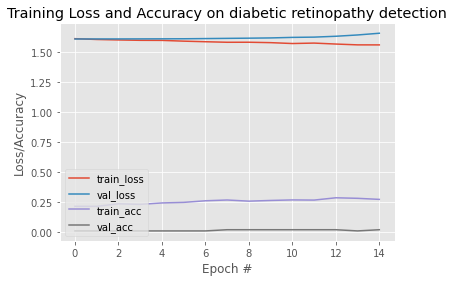

In [ ]:
import matplotlib
# set the matplotlib backend so figures can be saved in the background
# plot the training loss and accuracy
print("Generating plots...")
sys.stdout.flush()
matplotlib.use("Agg")
matplotlib.pyplot.style.use("ggplot")
matplotlib.pyplot.figure()
N = EPOCHS
matplotlib.pyplot.plot(np.arange(0, N), H.history["loss"], label="train_loss")
matplotlib.pyplot.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
matplotlib.pyplot.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
matplotlib.pyplot.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
matplotlib.pyplot.title("Training Loss and Accuracy on diabetic retinopathy detection")
matplotlib.pyplot.xlabel("Epoch #")
matplotlib.pyplot.ylabel("Loss/Accuracy")
matplotlib.pyplot.legend(loc="lower left")
matplotlib.pyplot.savefig("plot.png")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
score = model.evaluate(Xtest, testY, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.6579742431640625
Test accuracy: 0.02222222276031971


In [ ]:
path = '/content/gdrive/MyDrive/DR_MODEL/model'

In [ ]:
path2 = '/content/gdrive/MyDrive/best_model'

In [43]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

In [ ]:
from keras.models import load_model
tr_model = load_model(path2)

In [ ]:
Xtest = preprocess_input(Xtest)
Xtrain = preprocess_input(Xtrain)

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = []



# STEP 1: split X and y into training and testing sets

for train_index, test_index in skf.split(df['data'],df['Level']):
  X_train_fold, X_test_fold = Xtrain[train_index], Xtest[test_index] 
  y_train_fold, y_test_fold = trainY[train_index], testY[test_index] 
  tr_model.fit(X_train_fold, y_train_fold) 
  lst_accu_stratified.append(model.score(X_test_fold, y_test_fold))





NameError: ignored

In [ ]:
print('Maximum Accuracy',max(lst_accu_stratified)) 
print('Minimum Accuracy:',min(lst_accu_stratified)) 
print('Overall Accuracy:',mean(lst_accu_stratified))

In [ ]:
# convert the probabilities to class labels
label = decode_predictions(predictions, top=3)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[0],label[1], label[2],label[3],label[4]*100))

ValueError: ignored

In [ ]:
result = {"No DR":0,
            "Mild":1,
            "Moderate":2,
            "Severe":3,
            "Proliferative DR":4}
result = f"{class_names[np.argmax(scores)]} with a { (100 * np.max(scores)).round(2) } % confidence."
result

'Mild with a 24.97 % confidence.'

In [ ]:
test_classes = np.argmax(testY, axis =1)

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_classes, classes_x)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_classes, classes_x, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_classes, classes_x, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_classes, classes_x, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.022222
Precision: 0.022222
Recall: 0.022222
F1 score: 0.022222


In [ ]:
# reduce to 1d array
predict_x = predict_x[:,0]
classes_x = classes_x[:]

In [ ]:
!pip install streamlit

In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax
from keras.applications.vgg16 import preprocess_input
import os
import h5py
import random
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg

st.header("Diabetic Retinopathy Grade Classifier")

def main():
  file_uploaded = st.file_uploader("Please upload your image dataset", type = ["jpg", "png", "jpeg"])
  if file_uploaded is not None:
  images = os.listdir(file_uploaded)
  print("Number of files in " + file_uploaded + " is " + str(len(images)))
  for i in range(5):
    file = random.choice(os.listdir(file_uploaded))
    image_path = os.path.join(file_uploaded`  , file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)


def import_and_predict(imagepath):

  file_uploaded = imagepath
  imagepred = {}
  imageNameArr = []
  dataArr = []
  scoreArr =[]
  if file_uploaded is not None:
    images = os.listdir(file_uploaded)
    classifier_model = tf.keras.models.load_model(r'/content/gdrive/MyDrive/DR_model/best_model')
    shape = ((128,128,3))
    model = tf.keras.Sequential([hub.KerasLayer(classifier_model, input_shape = shape)])
    for imageFileName in images:
      imageFullPath = os.path.join(os.path.sep, file_uploaded, imageFileName)
      #print(imageFullPath)
      image = load_img(imageFullPath)
      resized_image = image.resize((128, 128))
      norm_image = np.array(resized_image, dtype="float") / 255.0
      reshaped_image = norm_image[np.newaxis, ...]
      preproc_image = preprocess_input(reshaped_image)
      class_names = ["No DR",
                   "Mild",
                   "Moderate",
                   "Severe",
                   "Proliferative DR"]
      predictions = model.predict(preproc_image)
      scores = tf.nn.softmax(predictions[0])
      scores = scores.numpy()
      image_class = class_names[np.argmax(scores)]
      result = image_class
      imagepred[imageFileName] = result
      imageNameArr.append(imageFileName)
      dataArr.append(result)
      scoreArr.append(scores[np.argmax(scores)])
      df = pd.DataFrame({'image': imageNameArr, 'result': dataArr,'maxScore':scoreArr})
      return df


pred = import_and_predict(imagepath)
st.subheader("Predictions")
st.write(pred)

st.bar_chart(pred['result'])
pred['result'].hist(figsize = (10, 5))
st.pyplot()


pivot = pred.pivot_table(index='result', aggfunc=len)
st.subheader("Distribution of Grades in the dataset")
st.write(pivot)


pred['group'] = np.where(pred['maxScore'] > 0.30, 1, 2)
st.subheader("Image Disease Grades with probability more than 80%")
if st.checkbox("Show Data"):
  st.subheader("Data")
  st.write(pred)





if __name__ == '__main__':
    main()


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/gdrive/MyDrive/DR_MODEL')

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok authtoken 20JnBFdxoO06z1Bn5FXfeqzpSIT_pn3b2f1N1AVvg9oa4UXe')

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the ngrok URL: "+json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the ngrok URL: https://9d8e-35-231-226-103.ngrok.io


In [ ]:
!streamlit run /content/gdrive/MyDrive/DR_MODEL/streamlit_app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.231.226.103:8501

  Stopping...
^C


In [ ]:
import os
os.listdir('/content/gdrive/MyDrive/DR_MODEL')

['trainLabels.csv',
 'train',
 'best_model',
 'img_arr1.npz',
 'custom.css',
 'new_dataset',
 'model2',
 'model',
 'train.csv',
 'img_arr2.npz',
 'ngrok-stable-linux-amd64.zip',
 'tempDir',
 'streamlit_app.py',
 'app.py',
 'smote-vgg-model',
 'classweight-vgg-model',
 'smote-crossval-vgg-model',
 'trial2.ipynb',
 'new',
 'new-cropped.csv',
 'new_preprocessed_imgarr.npz',
 'model_accuracy.png',
 'model_loss.png',
 'DRvgg16 (size128,cropped,stratify-gausian).ipynb',
 'vgg16-gauss-smote',
 'DR3000-60.h5',
 "vgg16-128-gauss-smote'",
 'preprocessed_gauss_128_imgarr.npz',
 'vgg16-128-gauss-smote',
 'ngrok',
 'gaussianvggipynb.ipynb']

In [ ]:
#create class weights for unbalance dataset
from sklearn.utils import class_weight
y_train=train_generator.classes
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
class_weights=dict(enumerate(class_weights))

In [ ]:
results = model.fit_generator(train_generator,epochs=40,
                              steps_per_epoch=30,
                              validation_data=test_generator,
                             validation_steps=30,
                              callbacks=[es],
                             class_weight=class_weights)

In [ ]:
trainLabels = pd.read_csv("/content/gdrive/MyDrive/DR_MODEL/trainLabels.csv")
trainLabels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


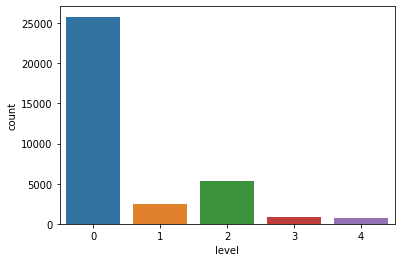

In [ ]:
import seaborn as sns
sns.countplot("level",data= trainLabels)

In [ ]:
images = os.listdir(trainDir)
print("Number of files in " + trainDir + " is " + str(len(images)))

data = []
for imagefilename in images:
  imagefullpath = os.path.join(os.path.sep,trainDir,imagefilename)
  image = Image.open(imagefullpath)  
  img = image.resize((img_rows,img_cols))
  rgb = img.convert('RGB')
  data.append(np.array(rgb).flatten())
  np.savez('img_arr2.npz', *data)

  


  


In [ ]:
container = np.load('img_arr2.npz')
data = [container[key] for key in container]

In [ ]:
images = os.listdir(trainDir)
imagelabels = []
for imagefilename in images:
  imagefilename = imagefilename.replace(".jpeg","")
  imagelabels.append(trainLabels.loc[trainLabels.image==imagefilename, 'level'].values[0])

In [ ]:
from sklearn.utils import shuffle

#converting images & labels to numpy arrays
data = np.asarray(data)
imagelabels = np.asarray(imagelabels)

img_data,Label = shuffle(data,imagelabels, random_state=2)
train_data = [img_data,Label]
type(train_data)

In [ ]:
train_data

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([4, 0, 2, ..., 0, 0, 0])]

severity 0
severity 0
severity 0
severity 0
severity 0
severity 2
severity 0
severity 0
severity 2
severity 0


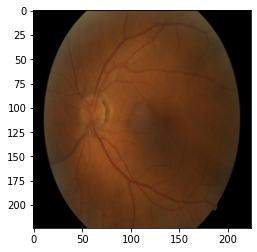

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
for i in range (10):
    img=data[i].reshape(img_rows,img_cols,3)
    print('severity',imagelabels[i])
    if(imagelabels[i]>0):
        plt.imshow(img)

In [ ]:
(X, y) = (train_data[0],train_data[1])
from sklearn.cross_validation import train_test_split

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 3)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 3)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


In [ ]:

df = pd.DataFrame (train_data).transpose()
df.columns = ['img_data', 'Label']
print (df)

                                            img_data                                              Label
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  [4, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, ...


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [ ]:
df['img_data']

0    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: img_data, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df,test_size=0.2) # Here we will perform an 80%/20% split of the dataset, with stratification to keep similar distribution in validation set